## **Business Problem Understanding**

### **Context**
Sebuah bank di Portugal menjalankan kampanye pemasaran melalui **telemarketing** untuk menawarkan **produk deposito berjangka (*term deposit*)**. Dalam kampanye ini, nasabah dihubungi satu per satu melalui panggilan telepon untuk menerima penawaran produk.

Namun, salah satu tantangan utama adalah **tingginya biaya operasional** akibat durasi panggilan yang panjang, terutama ketika dilakukan dalam skala besar. Meskipun panggilan telemarketing penting untuk menjangkau semua nasabah, **tidak semua interaksi berujung pada pembukaan deposito**, sehingga waktu dan biaya bisa terbuang sia-sia.

Selama kampanye berlangsung, berbagai data dikumpulkan, seperti:

1. Profil nasabah (umur, pekerjaan, status kredit, dll.)

2. Riwayat kampanye sebelumnya

3. Durasi panggilan (`duration`)

4. Biaya estimasi panggilan (`call_fee`)

Variabel `duration` terbukti memiliki **korelasi kuat dengan hasil kampanye (`y`)**, dan dapat digunakan untuk menyusun **strategi efisiensi durasi**, tanpa harus mengorbankan cakupan nasabah.

Perusahaan ingin mengetahui bagaimana durasi percakapan dapat dimanfaatkan secara **efisien** agar:

1. Tidak membuang biaya untuk nasabah yang tidak tertarik,

2. Tapi tetap mengoptimalkan konversi pada nasabah yang potensial membuka deposito.

Target
* `y = "no"`: Nasabah **tidak membuka** deposito
* `y = "yes"`: Nasabah **membuka deposito**

### **Problem Statement**
Bank tetap ingin **menghubungi seluruh nasabah,** namun menghadapi risiko:

1. **Durasi panggilan yang terlalu panjang** pada nasabah yang tidak tertarik

2. **Pemborosan biaya komunikasi** dan beban waktu bagi agen telemarketing

Oleh karena itu, perlu diterapkan strategi **cut-off durasi** (`duration_cut_off`) yang optimal, yaitu batas waktu maksimal percakapan berdasarkan hasil historis dan potensi konversi nasabah.

#### **Berdasarkan hasil analisis data:**

1. **Total biaya aktual (tanpa cut-off):** €45.359,00

2. **Total biaya setelah cut-off:** €24.857,60

3. **Penghematan biaya: €20.501,40 (45%)**

#### **Selain itu, dari sisi waktu:**

1. **Total durasi aktual panggilan:** 10.638.243 detik (**177.304 menit**)

2. **Total durasi setelah cut-off:** 5.991.325 detik (**99.855 menit**)

3. **Penghematan waktu: 4.646.918 detik** (**77.448 menit) (43,68%)**

Sama dengan **1.290 jam telepon**, atau hampir **161 hari kerja agen** (8 jam per hari)

### **Goals**
Proyek ini bertujuan untuk:

1. **Meningkatkan efisiensi kampanye telemarketing** tanpa mengorbankan jangkauan nasabah

2. **Menetapkan batas durasi optimal** (`duration_cut_off`) berdasarkan data historis

3. **Menghemat biaya dan waktu** melalui strategi cut-off, khususnya pada nasabah yang tidak tertarik

4. Membangun **model prediktif** untuk membantu mengenali nasabah yang potensial membuka deposito (`y = "yes"`)

### **Analytic Approach**
Pendekatan yang dilakukan meliputi:

1. **Analisis eksploratif** terhadap variabel-variabel yang berkorelasi dengan konversi (`y`)

2. Penambahan fitur biaya (`call_fee`) dan `duration_cut_off` sebagai strategi efisiensi

3. Penerapan **model machine learning** untuk memprediksi apakah nasabah akan membuka deposito

4. Evaluasi strategi cut-off dalam menurunkan biaya dan durasi panggilan

### **Metric Evaluation**

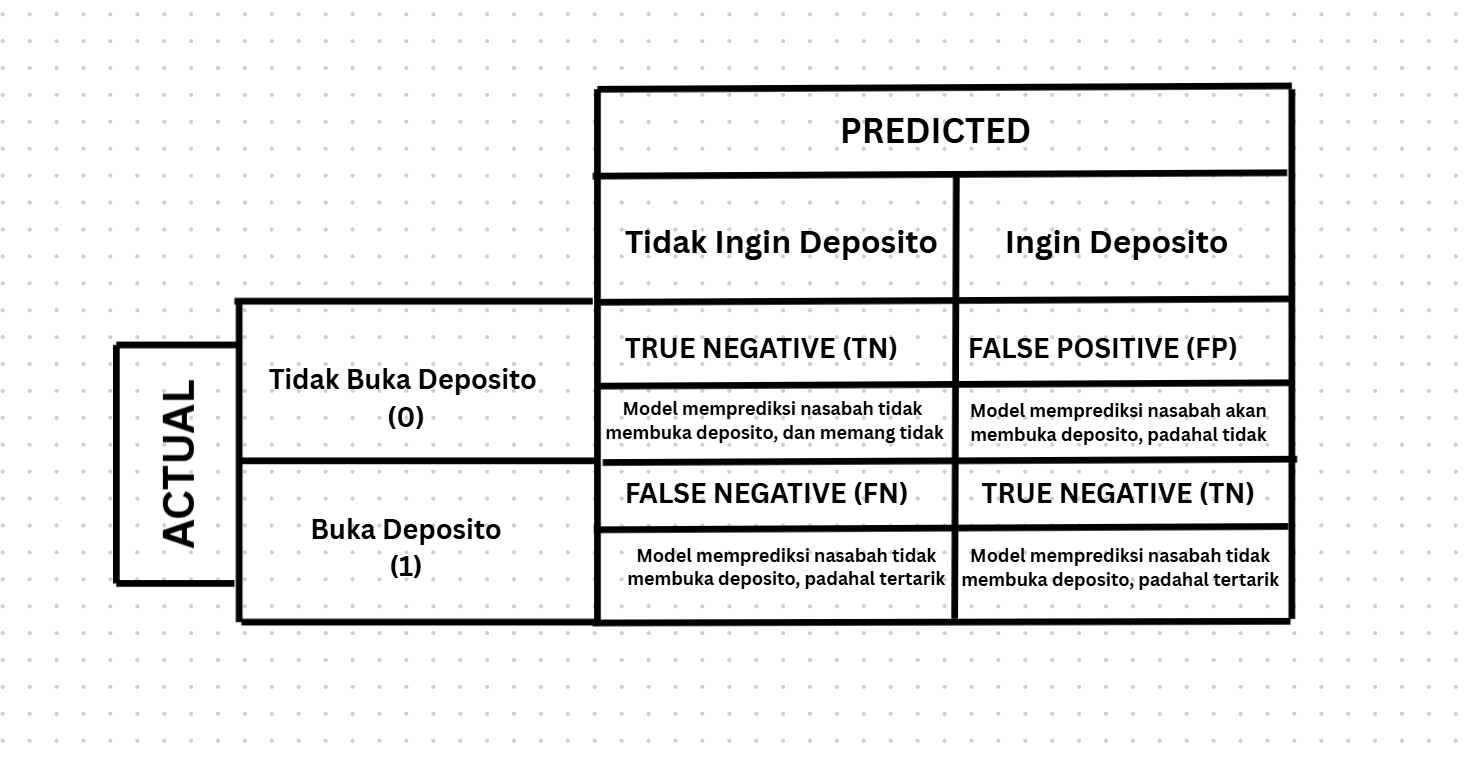

|                                     | **PREDICTED: Tidak buka deposito (0)**                                                               | **PREDICTED: Buka deposito (1)**                                                              |
| ----------------------------------- | ---------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------- |
| **ACTUAL: Tidak buka deposito (0)** | **True Negative (TN)**<br>Model memprediksi nasabah tidak membuka deposito, dan memang tidak membuka | **False Positive (FP)**<br>Model memprediksi nasabah akan membuka deposito, padahal tidak     |
| **ACTUAL: Buka deposito (1)**       | **False Negative (FN)**<br>Model memprediksi nasabah tidak membuka deposito, padahal tertarik        | **True Positive (TP)**<br>Model memprediksi nasabah akan membuka deposito, dan memang membuka |


#### **Error Analysis**
Type 1 Error (False Positive)

❗ Model bilang nasabah akan tertarik, tapi ternyata tidak.

💸 Konsekuensi: Biaya telepon terbuang sia-sia, waktu agent habis, pulsa & tenaga terbuang.

Type 2 Error (False Negative)

❗ Model bilang nasabah tidak tertarik, padahal sebenarnya tertarik.

📉 Konsekuensi: Kehilangan nasabah potensial yang seharusnya bisa buka deposito → rugi peluang bisnis.

#### **Trade-off & Strategi**

Berdasarkan konsekuensinya:

1. Kita **tidak ingin terlalu banyak False Positives** → buang biaya

2. Tapi juga **tidak boleh terlalu banyak False Negatives** → kehilangan target prospek

Artinya, model perlu seimbang:

1. **Precision tinggi** → agar prediksi `ya` benar-benar akurat

2. **Recall tinggi** → agar tidak melewatkan nasabah potensial

#### **Metrik Evaluasi Utama**

Karena target `y` bersifat biner (`"yes"` / `"no"`), model akan dievaluasi menggunakan:

1. **Precision**: Untuk menghindari menyasar nasabah yang tidak tertarik (biaya sia-sia)

2. **Recall**: Untuk tidak melewatkan nasabah potensial

3. **F1-score**: Keseimbangan antara precision dan recall

4. **PR Curve & ROC AUC**: Khususnya karena data bersifat **imbalanced**

#### **Risiko yang harus dihindari:**

1. **False Positive** → Biaya percakapan terbuang (salah prediksi ya)

2. **False Negative** → Peluang konversi hilang (salah prediksi tidak)

#### **Kesimpulan**
Untuk kampanye telemarketing deposito:

Kita butuh model klasifikasi yang dapat **mengenali nasabah potensial** membuka deposito, **sambil menekan jumlah telepon yang sia-sia**.

## **Data Understanding**

### **Sumber Data**

Sumber data
1. Tautan: https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset/code
2. Judul: ***Bank marketing campaigns dataset | Opening Deposit***

Note:
1. **Dataset bersifat imbalanced**

    * Target `y` didominasi oleh label `"no"` (nasabah tidak membuka deposito)

    * Hanya sebagian kecil data yang memiliki label `"yes"`

    * Implikasi: perlu teknik penanganan imbalance dalam modeling (misalnya oversampling, undersampling, atau penyesuaian metrik evaluasi)

2. **Fitur dominan kategorikal**

    * Banyak fitur berupa data kategorikal:

        * **Nominal**: `job`, `contact`, `education`, `marital`, `poutcome`

        * **Ordinal (berurutan)**: `month`, `day_of_week`

    * Perlu proses encoding yang sesuai, misalnya one-hot encoding atau ordinal encoding

3. Fitur numerik merepresentasikan intensitas kampanye

    * Contoh:

        * `campaign`: jumlah kontak selama kampanye ini

        * `pdays`: hari sejak terakhir dihubungi

        * `previous`: jumlah kontak pada kampanye sebelumnya

    * Dapat digunakan untuk mengukur "ketekunan" dalam kampanye pemasaran

4. **Setiap baris merepresentasikan 1 interaksi telemarketing**

    * Unit observasi adalah **panggilan telepon per nasabah**

    * Berarti nasabah bisa saja dihubungi lebih dari satu kali

5. **Fitur `duration` mengandung informasi pasca-panggilan**

    * Durasi panggilan hanya diketahui **setelah** panggilan terjadi

    * Oleh karena itu, **tidak boleh digunakan sebagai fitur prediktor**

    * Penggunaan `duration` sebagai input akan menyebabkan **data leakage**

6. **Fitur `call_fee` dan `duration_cut_off` diturunkan dari data asli**

    * Fitur ini merupakan hasil rekayasa fitur (*feature engineering*)

    * Sangat berguna untuk analisis biaya, namun harus digunakan hati-hati saat modeling

7. **Terdapat nilai `"unknown"` dalam beberapa kolom**

    * Fitur seperti `job`, `education`, `contact`, `default` memiliki kategori `"unknown"`

    * Perlu ditangani secara eksplisit (misalnya dimasukkan sebagai kategori sendiri atau diganti/diimputasi)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display, HTML
from tabulate import tabulate

In [38]:
file_path = "../data/revision/bank-additional-call-fee.csv"
df = pd.read_csv(file_path, sep=';') 

### **Attribute Information**

In [5]:
# 1. Ambil tipe data asli dari DataFrame
df_dtypes = pd.DataFrame(df.dtypes, columns=['Data Type']).reset_index()
df_dtypes.columns = ['Attribute', 'Data Type']

# 2. Buat deskripsi tambahan manual (dari informasi yang Anda berikan)
deskripsi_manual = [
    ["age", "Numerik", "Usia klien"],
    ["job", "Kategorikal", "Jenis Pekerjaan Klien"],
    ["marital", "Kategorikal", "Status Pernikahan Klien"],
    ["education", "Kategorikal", "Tingkat pendidikan klien"],
    ["default", "Kategorikal", "Status kredit klien"],
    ["housing", "Kategorikal", "Status apakah klien memiliki pinjamanan perumahan"],
    ["loan", "Kategorikal", "Status apakah klien memiliki pinjaman pribadi"],
    ["contact", "Kategorikal", "Jenis komunikasi kontak terakhir"],
    ["month", "Kategorikal", "Bulan kontak terakhir dengan klien dalam tahun ini"],
    ["day_of_week", "Kategorikal", "Hari dalam seminggu kontak terakhir dengan klien"],
    ["duration", "Numerikal", "Durasi kontak terakhir dengan klien dalam detik"],
    ["campaign", "Numerikal", "Jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini"],
    ["pdays", "Numerikal", "Jumlah hari sejak klien terakhir kali dihubungi dari kampanye sebelumnya"],
    ["previous", "Numerikal", "Jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini"],
    ["poutcome", "Kategorikal", "Hasil dari kampanye pemasaran sebelumnya"],
    ["emp.var.rate", "Numerikal", "Tingkat variasi pekerjaan"],
    ["cons.price.idx", "Numerikal", "Indeks harga konsumen"],
    ["cons.conf.idx", "Numerikal", "Indeks kepercayaan konsumen"],
    ["euribor3m", "Numerikal", "Tingkat euribor 3 bulan"],
    ["nr.employed", "Numerikal", "Jumlah karyawan"],
    ["y", "Kategorikal", "Status apakah klien telah berlangganan deposito berjangka?"],
    ["call_fee", "Numerikal", "Biaya Penggunaan Telepon"],
    ["duration_cut_off", "Numerikal", "Durasi kontak \"cut off\" dengan klien dalam detik"],
    ["call_fee_cut_off", "Numerikal", "Biaya Penggunaan \"cut off\" Telepon"]
]

df_deskripsi = pd.DataFrame(deskripsi_manual, columns=["Attribute", "Jenis Data", "Deskripsi"])

# 3. Gabungkan kedua DataFrame berdasarkan kolom 'Attribute'
df_info_akhir = pd.merge(df_dtypes, df_deskripsi, on="Attribute", how="left")


# 4. Tampilkan hasil
# Buat HTML dari DataFrame tanpa index
html_table = df_info_akhir.to_html(index=False)

# Tambahkan atribut style langsung ke tag <th> dan <td>
html_table = html_table.replace(
    "<th>", '<th style="text-align: center; padding: 8px; background-color: #f2f2f2;">'
).replace(
    "<td>", '<td style="text-align: left; padding: 6px;">'
)

# Bungkus tabel agar tampil di tengah layar
html_centered = f"""
<div style="display: flex; justify-content: center;">
    {html_table}
</div>
"""

# Tampilkan hasil
display(HTML(html_centered))

Attribute,Data Type,Jenis Data,Deskripsi
age,int64,Numerik,Usia klien
job,object,Kategorikal,Jenis Pekerjaan Klien
marital,object,Kategorikal,Status Pernikahan Klien
education,object,Kategorikal,Tingkat pendidikan klien
default,object,Kategorikal,Status kredit klien
housing,object,Kategorikal,Status apakah klien memiliki pinjamanan perumahan
loan,object,Kategorikal,Status apakah klien memiliki pinjaman pribadi
contact,object,Kategorikal,Jenis komunikasi kontak terakhir
month,int64,Kategorikal,Bulan kontak terakhir dengan klien dalam tahun ini
day_of_week,int64,Kategorikal,Hari dalam seminggu kontak terakhir dengan klien


### **Dimesi Data**

In [149]:
df_shape = df.shape
df_dtypes = df.dtypes
df_head = df.head()

In [150]:
baris, kolom = df.shape
display(Markdown(f"**Dataset ini mempunyai:**\n- Jumlah data/baris: `{baris}`\n- Jumlah atribut/kolom: `{kolom}`"))

**Dataset ini mempunyai:**
- Jumlah data/baris: `41188`
- Jumlah atribut/kolom: `24`

### **Cuplikan Data**

In [151]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.7,170,0.3
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.1,60,0.1


## **Pre Processing**

### **Data Duplikasi**

#### **Pemeriksaan Data Duplikasi**

In [152]:
duplicate_rows_size = df.duplicated(keep=False).sum()
display(Markdown(f"Dataset ini mempunyai **{duplicate_rows_size}** data duplikat."))

Dataset ini mempunyai **24** data duplikat.

In [153]:
# Ambil baris-baris yang duplikat
duplicate_rows = df[df.duplicated(keep=False)]

# Tampilkan seluruh baris duplikat dalam bentuk tabel
display(duplicate_rows) 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0.3,120,0.2
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0.3,120,0.2
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no,0.2,90,0.2
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no,0.2,90,0.2
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,1.8,170,0.9
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,1.8,170,0.9
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0.3,60,0.3
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0.3,60,0.3
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,0.9,120,0.6
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,0.9,120,0.6


#### **Penghapusan Data Duplikasi**

In [154]:
output_path = "../data/revision/bank-additional-full-no-duplicates.csv"

In [155]:
# Remove duplicate rows and keep only the first occurrence
df_no_duplicates = df.drop_duplicates(keep='first')

# Save the cleaned DataFrame to a new CSV file
df_no_duplicates.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

Data akan disimpan di **../data/revision/bank-additional-full-no-duplicates.csv**

#### **Pembacaan Ulang DataFrame**

In [156]:
df = pd.read_csv(output_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5


In [157]:
baris, kolom = df.shape
display(Markdown(f"**Setelah Pemeriksaan Duplikasi Data. Dataset ini mempunyai:**\n- Jumlah data/baris: `{baris}`\n- Jumlah atribut/kolom: `{kolom}`"))

**Setelah Pemeriksaan Duplikasi Data. Dataset ini mempunyai:**
- Jumlah data/baris: `41176`
- Jumlah atribut/kolom: `24`

### **Perubahan Atribut** 

In [158]:
output_path = "../data/revision/bank-additional-full-perubahan-atribut.csv"

Untuk mempermudah analisis numerik dan pemodelan prediktif, dilakukan konversi nilai kategorikal pada atribut `month` dan `day_of_week` menjadi representasi numerik.

* **Atribut `month` yang semula berupa nama bulan (`"jan"`, `"feb"`, ..., `"dec"`) diubah menjadi angka 1–12**.

* **Atribut `day_of_week` yang semula berupa nama hari (`"mon"`, `"tue"`, ..., `"fri"`) diubah menjadi angka 1–5**.

#### **Perubahan data `month`**

In [159]:
print(df['day_of_week'].unique())

['mon' 'tue' 'wed' 'thu' 'fri']


In [160]:
# Map nama bulan ke angka
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df['month'] = df['month'].map(month_mapping)
Markdown("Perubahan data `month` selesai dilakukan")

Perubahan data `month` selesai dilakukan

#### **Perubahan data `day_of_week`**

In [161]:
# Map nama hari ke angka (opsi: Senin = 1 atau Minggu = 0)
# Pastikan nilai huruf kecil dan tanpa spasi
df['day_of_week'] = df['day_of_week'].astype(str).str.strip().str.lower()

# Lakukan mapping
day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3,
    'thu': 4, 'fri': 5
}

df['day_of_week'] = df['day_of_week'].map(day_mapping)
Markdown("Perubahan data `day_of_week` selesai dilakukan")

Perubahan data `day_of_week` selesai dilakukan

In [162]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,unknown,no,no,telephone,5,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,5,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,5,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,11,5,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5
41172,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9
41173,56,retired,married,university.degree,no,yes,no,cellular,11,5,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9
41174,44,technician,married,professional.course,no,no,no,cellular,11,5,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5


#### **Penyimpanan Data Perubahan**

In [163]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

Data akan disimpan di **../data/revision/bank-additional-full-perubahan-atribut.csv**

#### **Pembacaan Ulang DataFrame**

In [164]:
df = pd.read_csv(output_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,unknown,no,no,telephone,5,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,5,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,5,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,11,5,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5
41172,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9
41173,56,retired,married,university.degree,no,yes,no,cellular,11,5,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9
41174,44,technician,married,professional.course,no,no,no,cellular,11,5,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5


### **Perbaikan Missing Value**

In [165]:
output_path = "../data/revision/bank-additional-full-missing-value.csv"

Pada dataset ini, nilai hilang tidak ditandai dengan `NaN` secara eksplisit, melainkan dengan string `"unknown"`.
Oleh karena itu, untuk mempermudah proses analisis visual menggunakan pustaka/*library* seperti `missingno` dan memanfaatkan fungsi imputasi standar dari pandas atau scikit-learn, seluruh nilai `"unknown"` akan digantikan dengan `np.nan`.

Langkah ini penting untuk memastikan bahwa semua teknik penanganan missing value dapat berjalan dengan baik dan akurat.

#### **Perubahan ke null value**

In [166]:
import numpy as np

# Ganti semua 'unknown' menjadi np.nan di seluruh DataFrame
df.replace('unknown', np.nan, inplace=True)

Markdown("Perubahan data `\"unknown\"` ke `null` selesai dilakukan")

Perubahan data `"unknown"` ke `null` selesai dilakukan

#### **Penyimpanan Data Perubahan**

In [167]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

Data akan disimpan di **../data/revision/bank-additional-full-missing-value.csv**

#### **Pembacaan Ulang DataFrame**

In [168]:
df = pd.read_csv(output_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,NaN,no,no,telephone,5,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,5,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,5,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,11,5,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5
41172,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9
41173,56,retired,married,university.degree,no,yes,no,cellular,11,5,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9
41174,44,technician,married,professional.course,no,no,no,cellular,11,5,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5


#### **Pengecekan Nilai null**

In [1]:
output_path = "../data/revision/bank-additional-full-clean.csv"

In [170]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

# Misalnya df sudah didefinisikan sebelumnya
# df = pd.read_csv('data.csv')

listItem = []
for col in df.columns:
    try:
        unique_sample = list(df[col].dropna().drop_duplicates().sample(2).values)
    except ValueError:
        # Jika jumlah unique kurang dari 2
        unique_sample = list(df[col].dropna().drop_duplicates().values)
    
    listItem.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        round((df[col].isna().sum() / len(df[col])) * 100, 2),
        df[col].nunique(),
        unique_sample
    ])

dfDesc = pd.DataFrame(
    listItem,
    columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample']
)

# Bungkus tabel agar tampil di tengah layar
html_centered = f"""
<div style="display: flex; justify-content: center;">
    {dfDesc.to_html(index=False)}
</div>
"""

# Tampilkan hasil
display(HTML(html_centered))


dataFeatures,dataType,null,nullPct,unique,uniqueSample
age,int64,0,0.00,78,"[43, 40]"
job,object,330,0.80,11,"[entrepreneur, blue-collar]"
marital,object,80,0.19,3,"[divorced, single]"
education,object,1730,4.20,7,"[professional.course, high.school]"
default,object,8596,20.88,2,"[no, yes]"
housing,object,990,2.40,2,"[no, yes]"
loan,object,990,2.40,2,"[no, yes]"
contact,object,0,0.00,2,"[telephone, cellular]"
month,int64,0,0.00,10,"[5, 6]"
day_of_week,int64,0,0.00,5,"[3, 5]"


Berdasarkan hasil eksplorasi terhadap dataset, terdapat beberapa atribut yang memiliki **nilai kosong (null)** akibat proses konversi dari `"unknown"` ke `NaN`. Atribut-atribut dengan nilai null tersebut perlu ditangani agar tidak mengganggu proses pemodelan dan analisis lebih lanjut.

Berikut adalah daftar fitur dengan nilai null dan persentasenya:

1. `job` memiliki **330** nilai null (**0.80%**)

2. `marital` memiliki **80** nilai null (**0.19%**)

3. `education` memiliki **1,730** nilai null (**4.20%**)

4. `default` memiliki jumlah null tertinggi, yakni **8,596** nilai (**20.88%**)

5. `housing` memiliki **990** nilai null (**2.40%**)

6. `loan` memiliki **990** nilai null (**2.40%**)

Nilai null pada atribut-atribut ini umumnya berasal dari entri yang sebelumnya berisi `"unknown"`, dan kini ditandai sebagai `NaN` untuk mempermudah proses imputasi dan analisis dengan pustaka seperti `missingno`.

Berikutnya, sekarang mari kita visualisasikan missing values/data yang hilang pada dataframe kita dengan menggunakan library `missingno`

reference :

https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

https://github.com/ResidentMario/missingno

In [4]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

#### **Bar Plot**

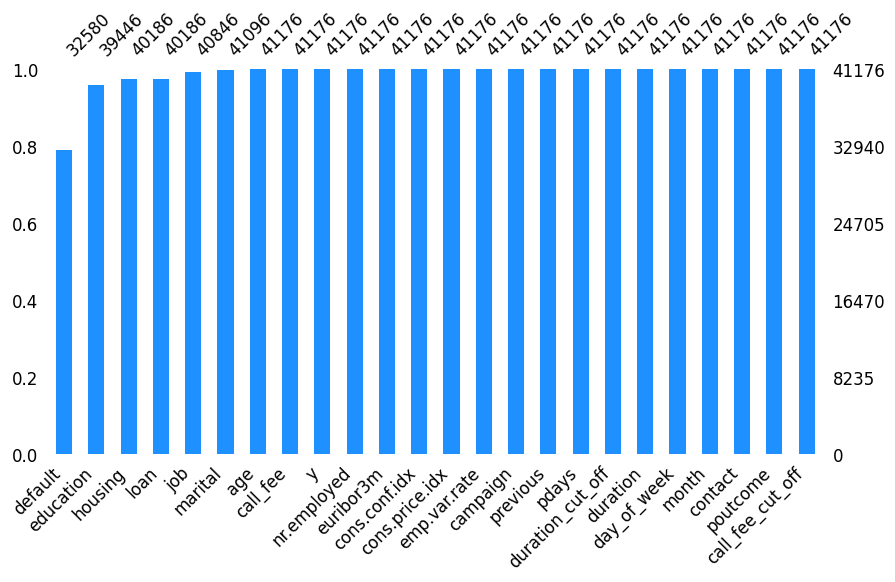

In [172]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

#### **Matriks Plot**

<Axes: >

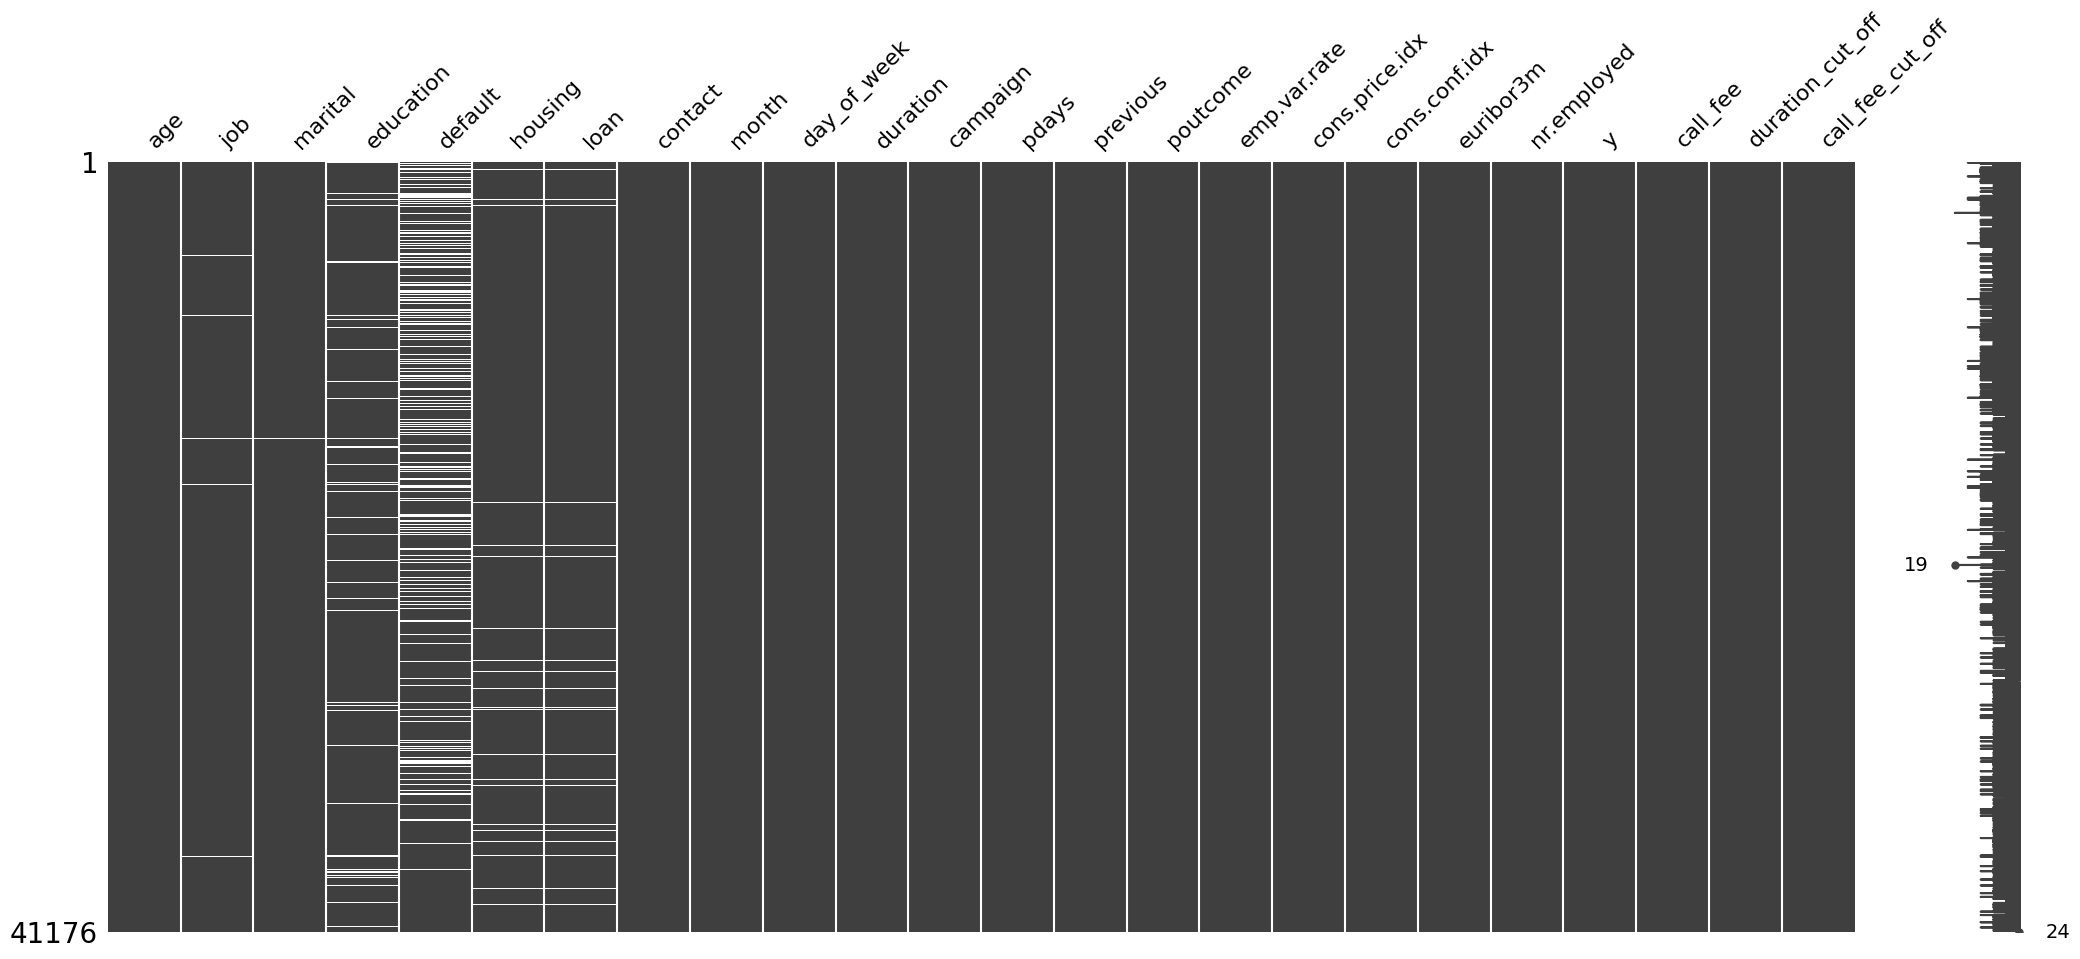

In [173]:
missingno.matrix(df)

#### **Heatmap**
Di bawah ini kita memplot Heatmap yang menunjukkan korelasi nulitas antara berbagai kolom yang memiliki data yang hilang pada dataset kita.

Korelasi nulitas berkisar dari -1 hingga 1.

* **-1** - **Korelasi Negatif** yang menyatakan bahwa jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada.
* **0** - **Tidak ada korelasi** yang menyatakan bahwa nilai variabel yang ada atau tidak ada tidak berpengaruh satu sama lain.
* **1** - **Korelasi Positif** yang menyatakan bahwa jika nilai satu variabel ada maka nilai yang lain pasti ada

<Axes: >

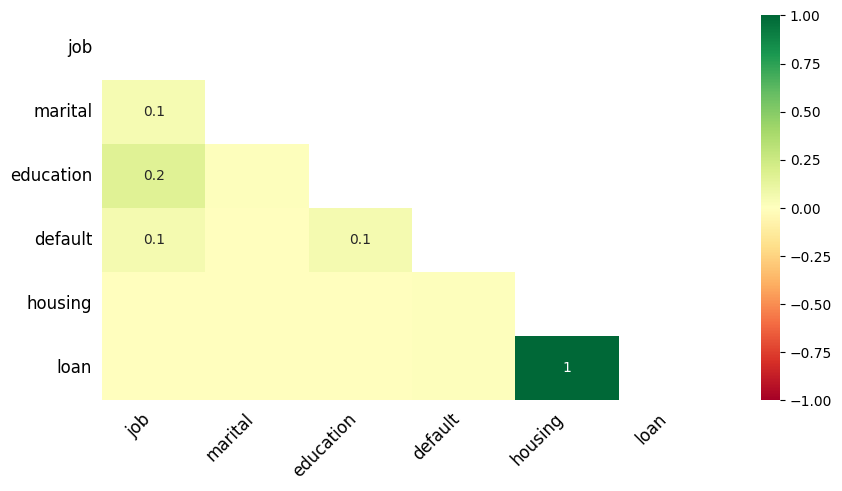

In [174]:
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12)

Gambar heatmap di atas menggambarkan **korelasi antar kolom** yang memiliki nilai hilang (`null`) dalam dataset. Visualisasi ini membantu kita memahami apakah ada pola ketergantungan antar kolom yang kosong, yang bisa menjadi dasar strategi imputasi yang lebih tepat.

Beberapa insight penting dari heatmap tersebut:

1. Korelasi tertinggi muncul antara kolom `housing` dan `loan`, dengan nilai **1.0**, yang artinya **jika salah satu kolom missing, maka kolom lainnya juga pasti missing**. Ini menunjukkan hubungan yang sangat erat dan bisa dipertimbangkan untuk diimputasi secara bersamaan atau berdasarkan pola yang sama.

2. Korelasi rendah namun terdeteksi antara:

    1. `education` dan `job` sebesar **0.2**

    2. `education` dan `marital` sebesar **0.1**

    3. `default` dan `education` sebesar **0.1**

    Meskipun rendah, hal ini bisa menjadi pertimbangan tambahan ketika kita menyusun strategi imputasi berdasarkan relasi antar fitur.

3. Fitur seperti `job`, `marital`, dan `default` memiliki nilai korelasi yang sangat rendah antar satu sama lain, menunjukkan bahwa missing value di kolom tersebut terjadi secara **relatif independen**.

Secara keseluruhan, heatmap ini memberikan pemahaman bahwa **beberapa kolom memiliki keterkaitan dalam pola missing value-nya**, dan pendekatan imputasi berdasarkan korelasi ini akan lebih efektif dibandingkan imputasi global tanpa mempertimbangkan hubungan antar fitur.

#### **Dendogram**

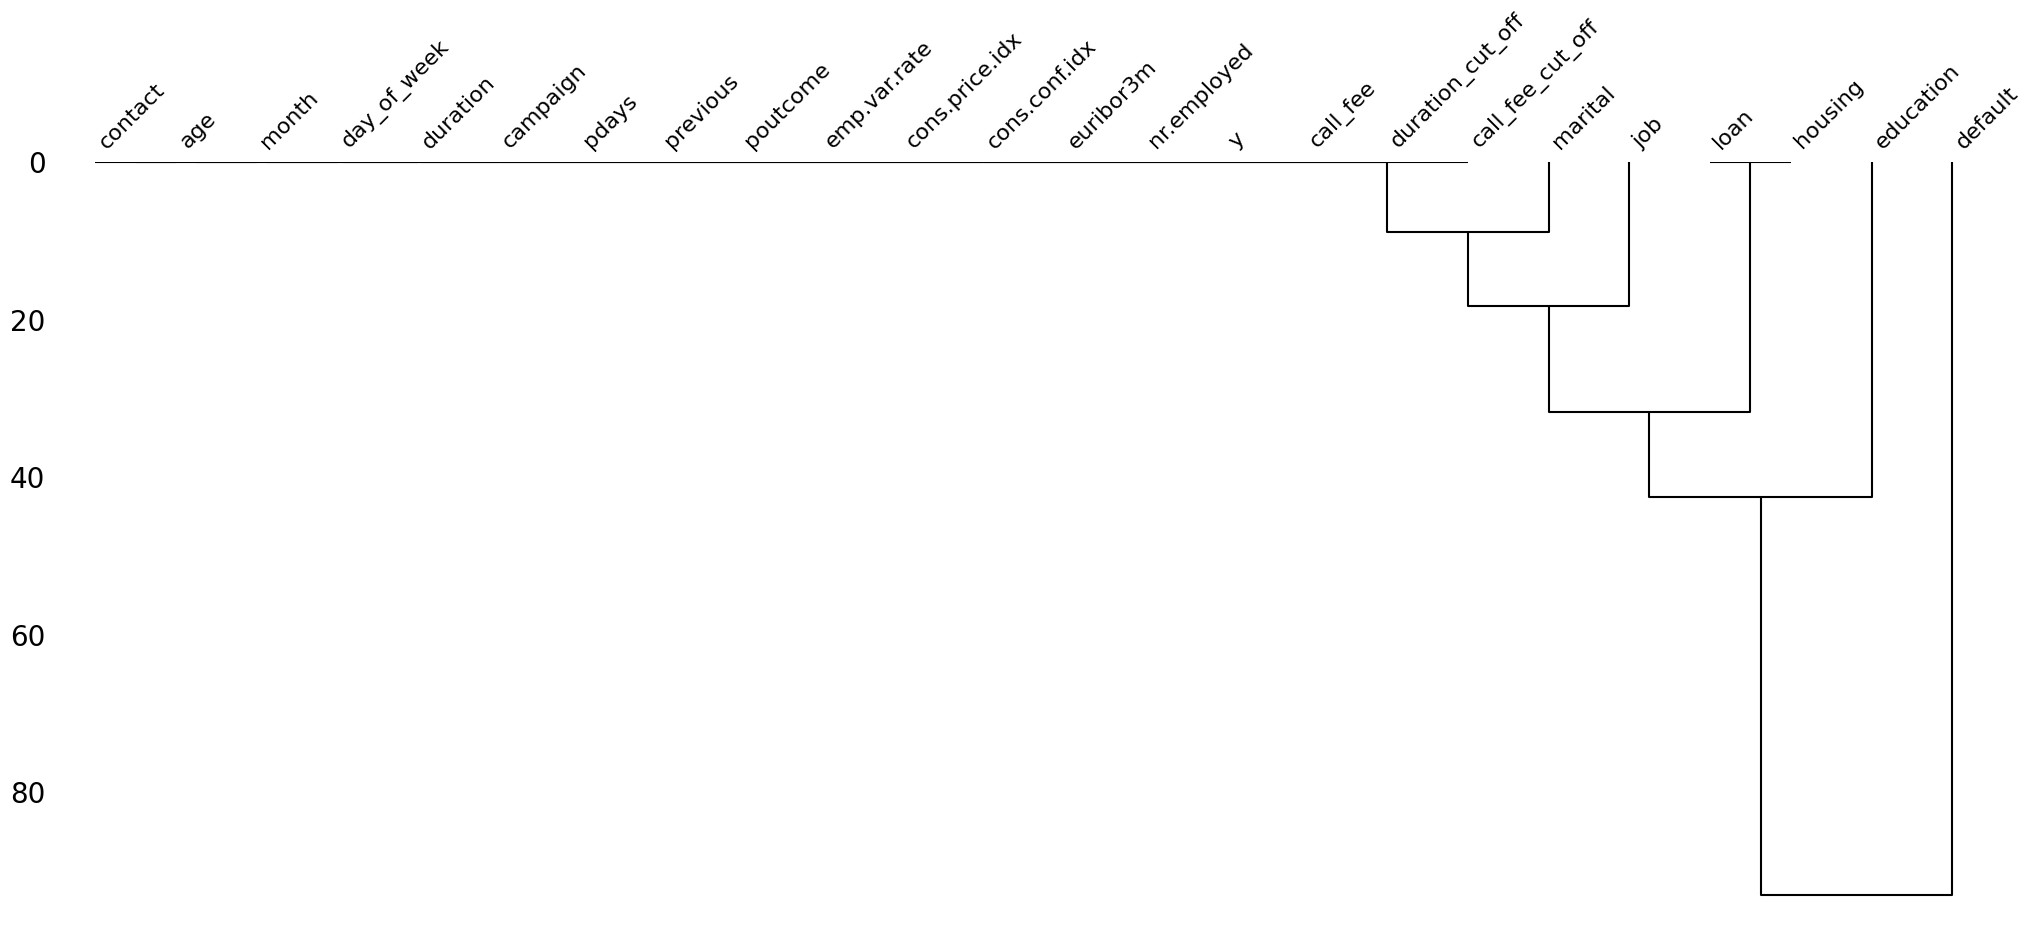

In [175]:
missingno.dendrogram(df)
plt.show()

Visualisasi dendogram di atas memberikan gambaran **struktur hierarki keterkaitan antar kolom** berdasarkan pola missing value yang ada dalam dataset. Dendogram ini berguna untuk mengelompokkan fitur-fitur yang cenderung memiliki pola missing yang **mirip atau terjadi bersamaan**.

Dari hasil dendogram dapat diperhatikan bahwa:

1. Kolom-kolom yang berada dalam **cabang yang sama atau berdekatan**, seperti `job`, `marital`, `loan`, `housing`, `education`, dan `default`, memiliki hubungan keterkaitan dalam hal keberadaan nilai `null`.

2. Kelompok tersebut menunjukkan bahwa **jika sebuah fitur memiliki missing value, fitur lain dalam grup tersebut juga cenderung memiliki missing value**.

3. Hal ini memberikan sinyal bahwa **strategi imputasi bisa dilakukan secara terarah** berdasarkan grup fitur tersebut, bukan secara individual.

Dengan mempertimbangkan hasil dendogram ini, kita akan melakukan **perbaikan nilai null secara bertahap**, dimulai dari fitur yang saling berkaitan secara hierarki, guna menjaga integritas dan konsistensi data.

In [176]:
# Imputasi 'education' berdasarkan 'job'
df['education'] = df.groupby('job')['education'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)
Markdown("Imputasi `education` berdasarkan `job`")

# Imputasi 'marital' berdasarkan 'job'
df['marital'] = df.groupby('job')['marital'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'married')
)
Markdown("Imputasi `marital` berdasarkan `job`")

# Imputasi 'job' berdasarkan 'marital'
df['job'] = df.groupby('marital')['job'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'admin.')
)
Markdown("Imputasi `job` berdasarkan `marital`")

# Imputasi 'housing' berdasarkan 'loan'
df['housing'] = df.groupby('loan')['housing'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'yes')
)
Markdown("Imputasi `housing` berdasarkan `loan`")

# Imputasi 'loan' berdasarkan 'housing'
df['loan'] = df.groupby('housing')['loan'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'no')
)
Markdown("Imputasi `loan` berdasarkan `housing`")

# Imputasi 'default' berdasarkan 'education'
df['default'] = df.groupby('education')['default'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'no')
)
Markdown("Imputasi 'default' berdasarkan 'education'")

Imputasi 'default' berdasarkan 'education'

In [177]:
print("Sisa missing value setelah imputasi global terakhir:")
print(df.isna().sum()[df.isna().sum() > 0])


Sisa missing value setelah imputasi global terakhir:
job          330
marital      330
education    330
default      330
housing      990
loan         990
dtype: int64


In [178]:
# Imputasi global terakhir menggunakan mode
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['marital'].fillna(df['marital'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['default'].fillna(df['default'].mode()[0], inplace=True)
df['housing'].fillna(df['housing'].mode()[0], inplace=True)
df['loan'].fillna(df['loan'].mode()[0], inplace=True)
Markdown("Imputasi global terakhir menggunakan mode")

Imputasi global terakhir menggunakan mode

In [179]:
print("Sisa missing value setelah imputasi global terakhir:")
print(df.isna().sum()[df.isna().sum() > 0])

Sisa missing value setelah imputasi global terakhir:
Series([], dtype: int64)


#### **Penyimpanan Data Perubahan¶**

In [180]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

Data akan disimpan di **../data/revision/bank-additional-full-clean.csv**

#### **Pembacaan Ulang DataFrame**

In [4]:
df = pd.read_csv(output_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,no,no,no,telephone,5,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,5,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,5,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,11,5,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5
41172,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9
41173,56,retired,married,university.degree,no,yes,no,cellular,11,5,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9
41174,44,technician,married,professional.course,no,no,no,cellular,11,5,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5


## **Explonatory Data Analys (EDA)**

### **Read file**

In [5]:
output_path = "../data/revision/bank-additional-full-data-analyst.csv"

### **Read file for Data Analyst**

In [6]:
df = pd.read_csv(output_path, sep=';')
# df['y'] = df['y'].map({'yes': 1, 'no': 0})
# df['default'] = df['default'].map({'yes': 1, 'no': 0})
# df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
# df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
# df['contact'] = df['contact'].map({'telephone': 0, 'cellular': 1})
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,0,0,0,0,5,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.5,170,0.3
1,57,services,married,high.school,0,0,0,0,5,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.3,120,0.2
2,37,services,married,high.school,0,1,0,0,5,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.4,170,0.3
3,40,admin.,married,basic.6y,0,0,0,0,5,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.3,120,0.2
4,56,services,married,high.school,0,0,1,0,5,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.6,170,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,0,1,0,1,11,5,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1.8,300,1.5
41172,46,blue-collar,married,professional.course,0,0,0,1,11,5,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,2.1,170,0.9
41173,56,retired,married,university.degree,0,1,0,1,11,5,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1.2,170,0.9
41174,44,technician,married,professional.course,0,0,0,1,11,5,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,2.4,300,1.5


In [7]:
df = df.drop(columns=['duration', 'call_fee', 'duration_cut_off', 'call_fee_cut_off'], errors='ignore')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,0,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,0,0,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,0,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,0,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,0,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,0,1,0,1,11,5,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41172,46,blue-collar,married,professional.course,0,0,0,1,11,5,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41173,56,retired,married,university.degree,0,1,0,1,11,5,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41174,44,technician,married,professional.course,0,0,0,1,11,5,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [23]:
df = df.drop(columns=['month', 'day_of_week'], errors='ignore')
df

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,0,1,0,1,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41172,46,blue-collar,married,professional.course,0,0,0,1,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41173,56,retired,married,university.degree,0,1,0,1,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41174,44,technician,married,professional.course,0,0,0,1,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [5]:
output_path = "../data/revision/bank-additional-full-data-analyst2.csv"

In [25]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

Data akan disimpan di **../data/revision/bank-additional-full-data-analyst2.csv**

In [6]:
df = pd.read_csv(output_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,0,1,0,1,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41172,46,blue-collar,married,professional.course,0,0,0,1,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41173,56,retired,married,university.degree,0,1,0,1,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41174,44,technician,married,professional.course,0,0,0,1,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


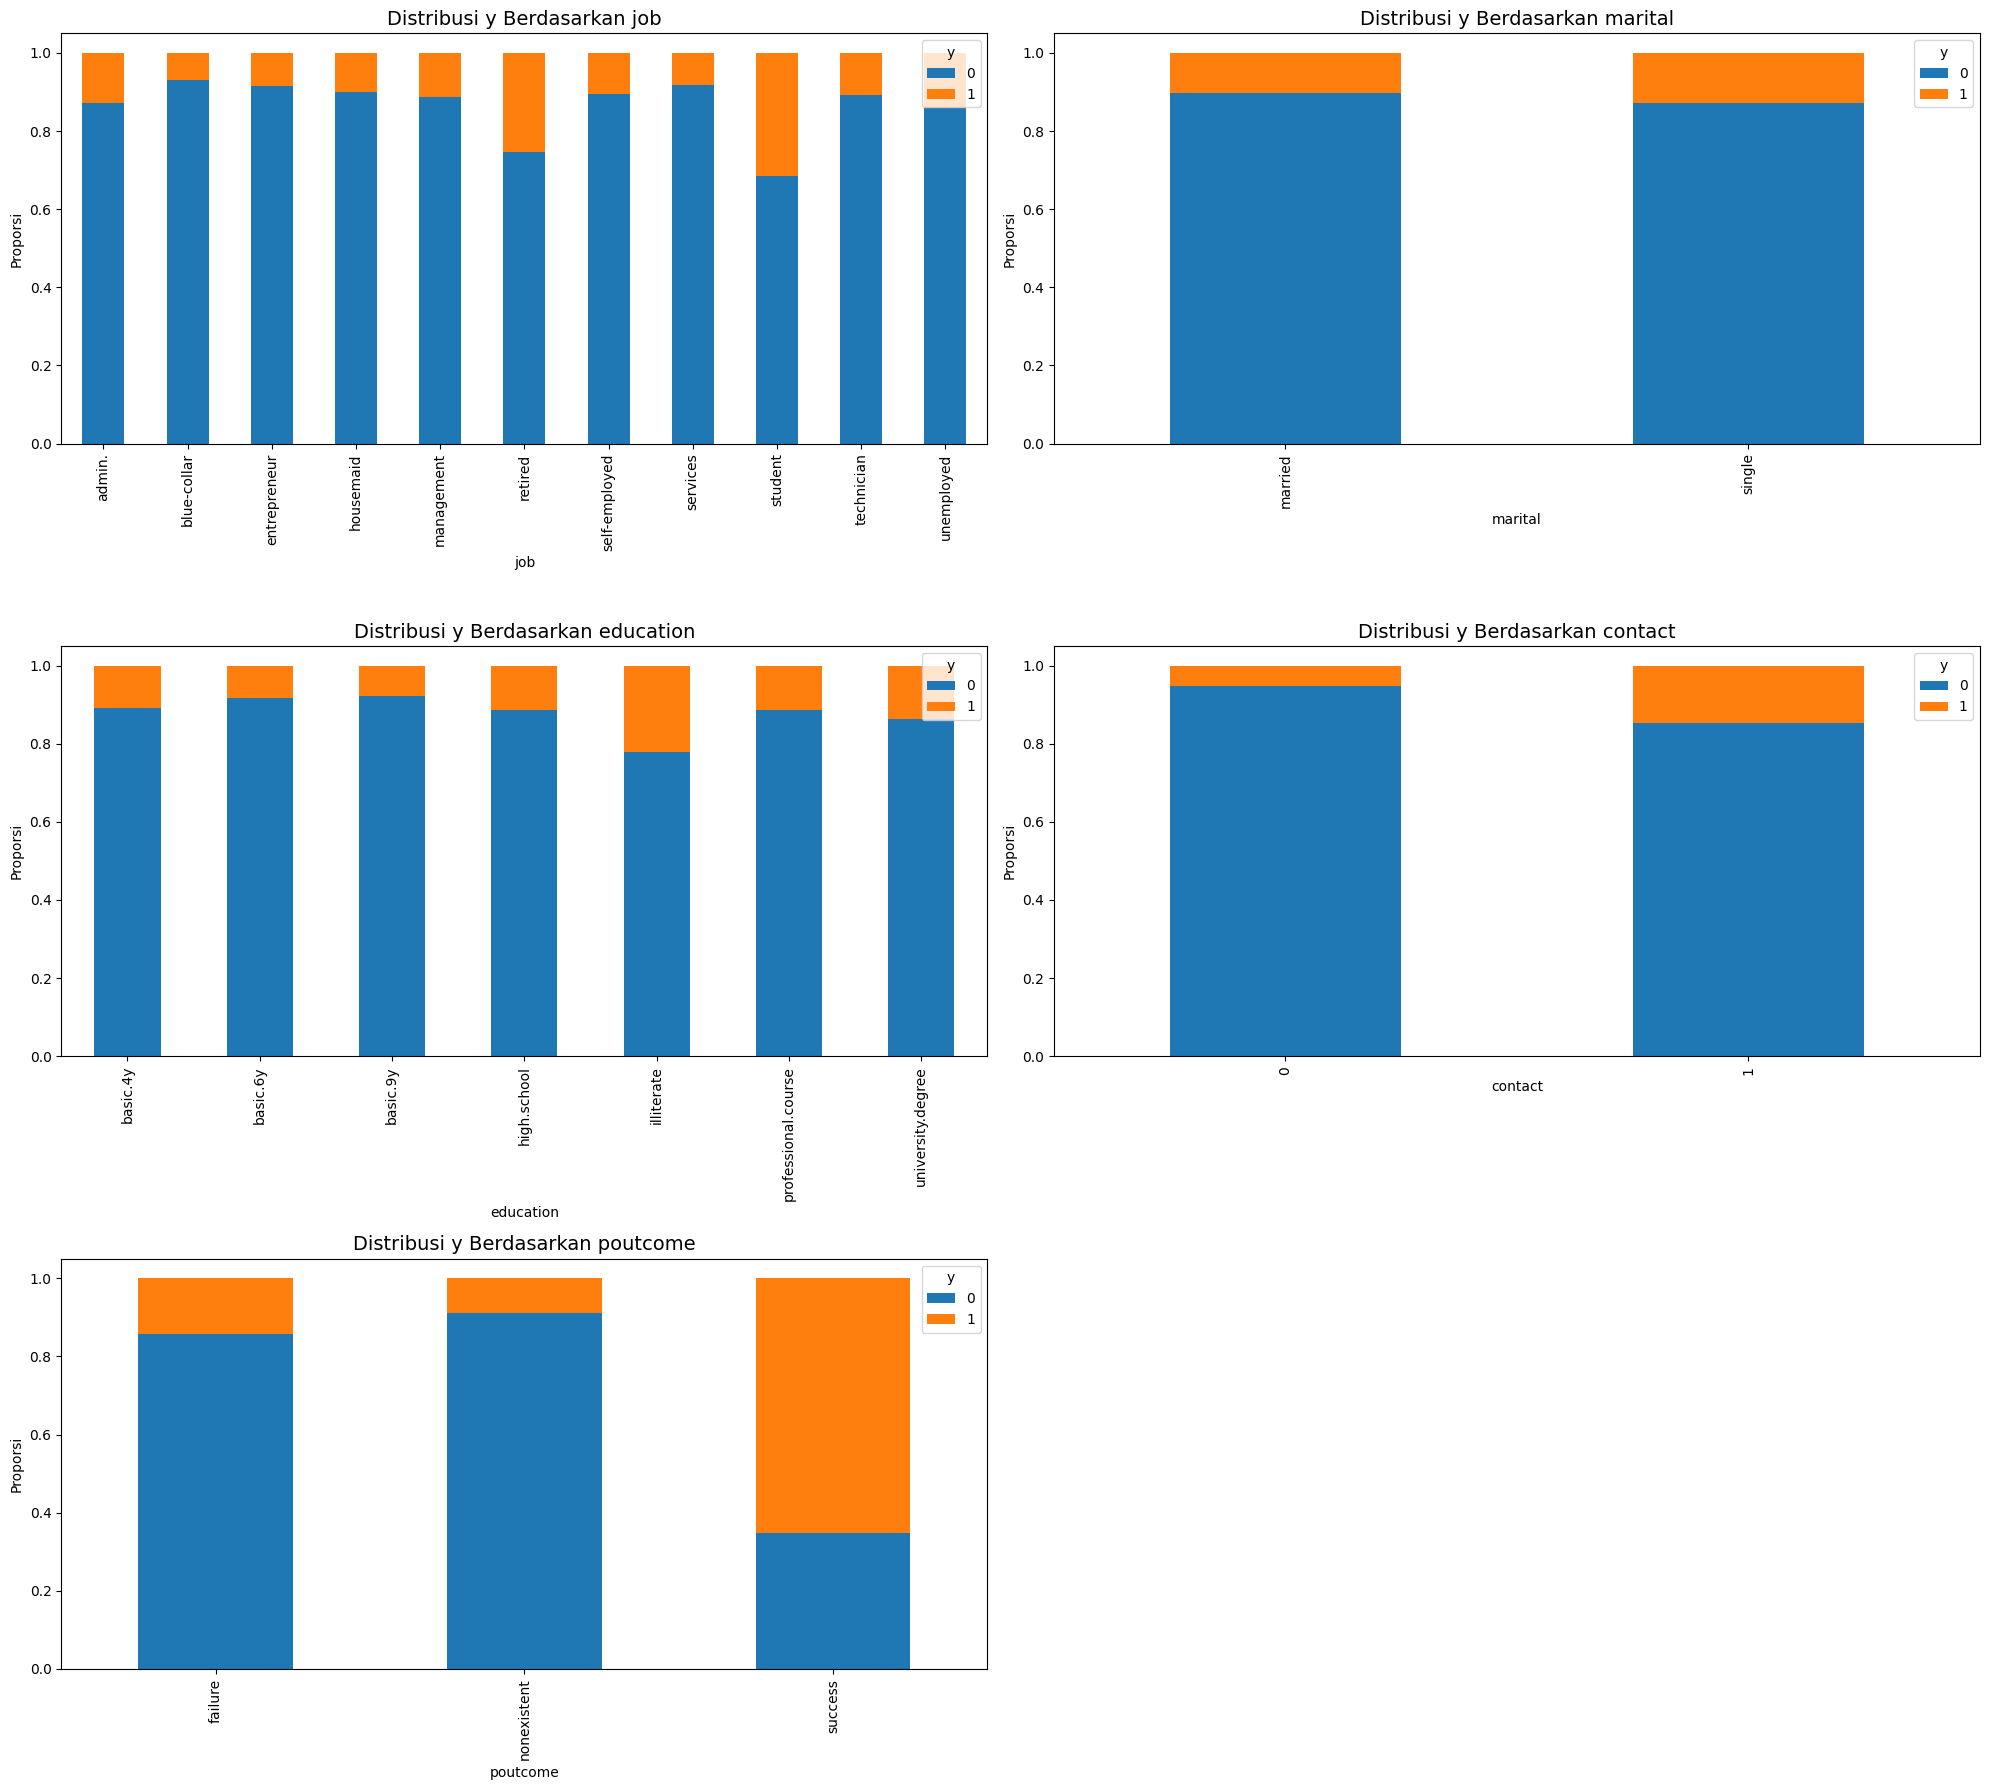

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

categorical_columns = ['job', 'marital', 'education', 'contact', 'poutcome']

plt.figure(figsize=(20, 18))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    prop = pd.crosstab(df[col], df['y'], normalize='index')
    prop.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Distribusi y Berdasarkan {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Proporsi')
    plt.legend(title='y', loc='upper right')

plt.tight_layout()
plt.show()


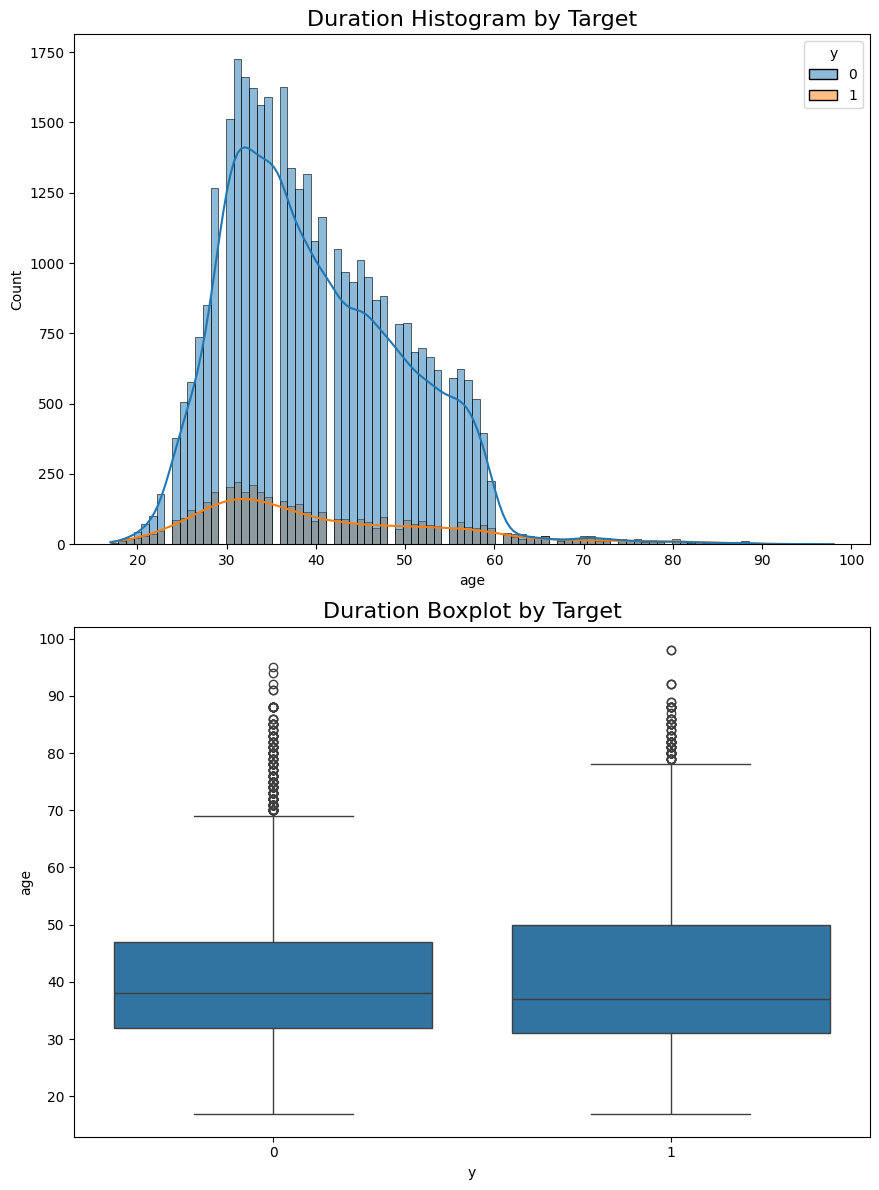

In [7]:
# import matplotlib.pyplot as plt
# import seaborn as sns

plt.figure(figsize=(17, 12))

# Histogram 1: duration
plt.subplot(221)
sns.histplot(data=df, x='age', hue='y', kde=True)
plt.title('Duration Histogram by Target', fontsize=16)

# # Histogram 2: call_fee
# plt.subplot(222)
# sns.histplot(data=df, x='month', hue='y', kde=True)
# plt.title('Call Fee Histogram by Target', fontsize=16)

# Boxplot 1: duration
plt.subplot(223)
sns.boxplot(data=df, y='age', x='y')
plt.title('Duration Boxplot by Target', fontsize=16)

# Boxplot 2: call_fee
# plt.subplot(224)
# sns.boxplot(data=df, y='month', x='y')
# plt.title('Call Fee Boxplot by Target', fontsize=16)

plt.tight_layout()
plt.show()


Berdasarkan histogram dan boxplot di atas, tampak bahwa terdapat **perbedaan distribusi** `call_fee` dan `duration` antara nasabah yang tidak tertarik (`y = "no"`) dan yang tertarik (`y = "yes"`) untuk membuka deposito berjangka.

Nasabah yang **tertarik** (`"yes"`) **cenderung memiliki** `duration` **atau durasi percakapan yang lebih lama**, dibandingkan yang tidak tertarik. Hal serupa juga berlaku pada `call_fee`, di mana biaya panggilan cenderung lebih tinggi untuk nasabah yang akhirnya tertarik. Ini wajar, karena percakapan yang lebih lama biasanya menunjukkan interaksi yang lebih mendalam.

Sementara itu, tidak terlihat distribusi yang sama antar kedua target, sehingga baik `duration` maupun `call_fee` kemungkinan merupakan fitur yang relevan untuk proses modeling selanjutnya.

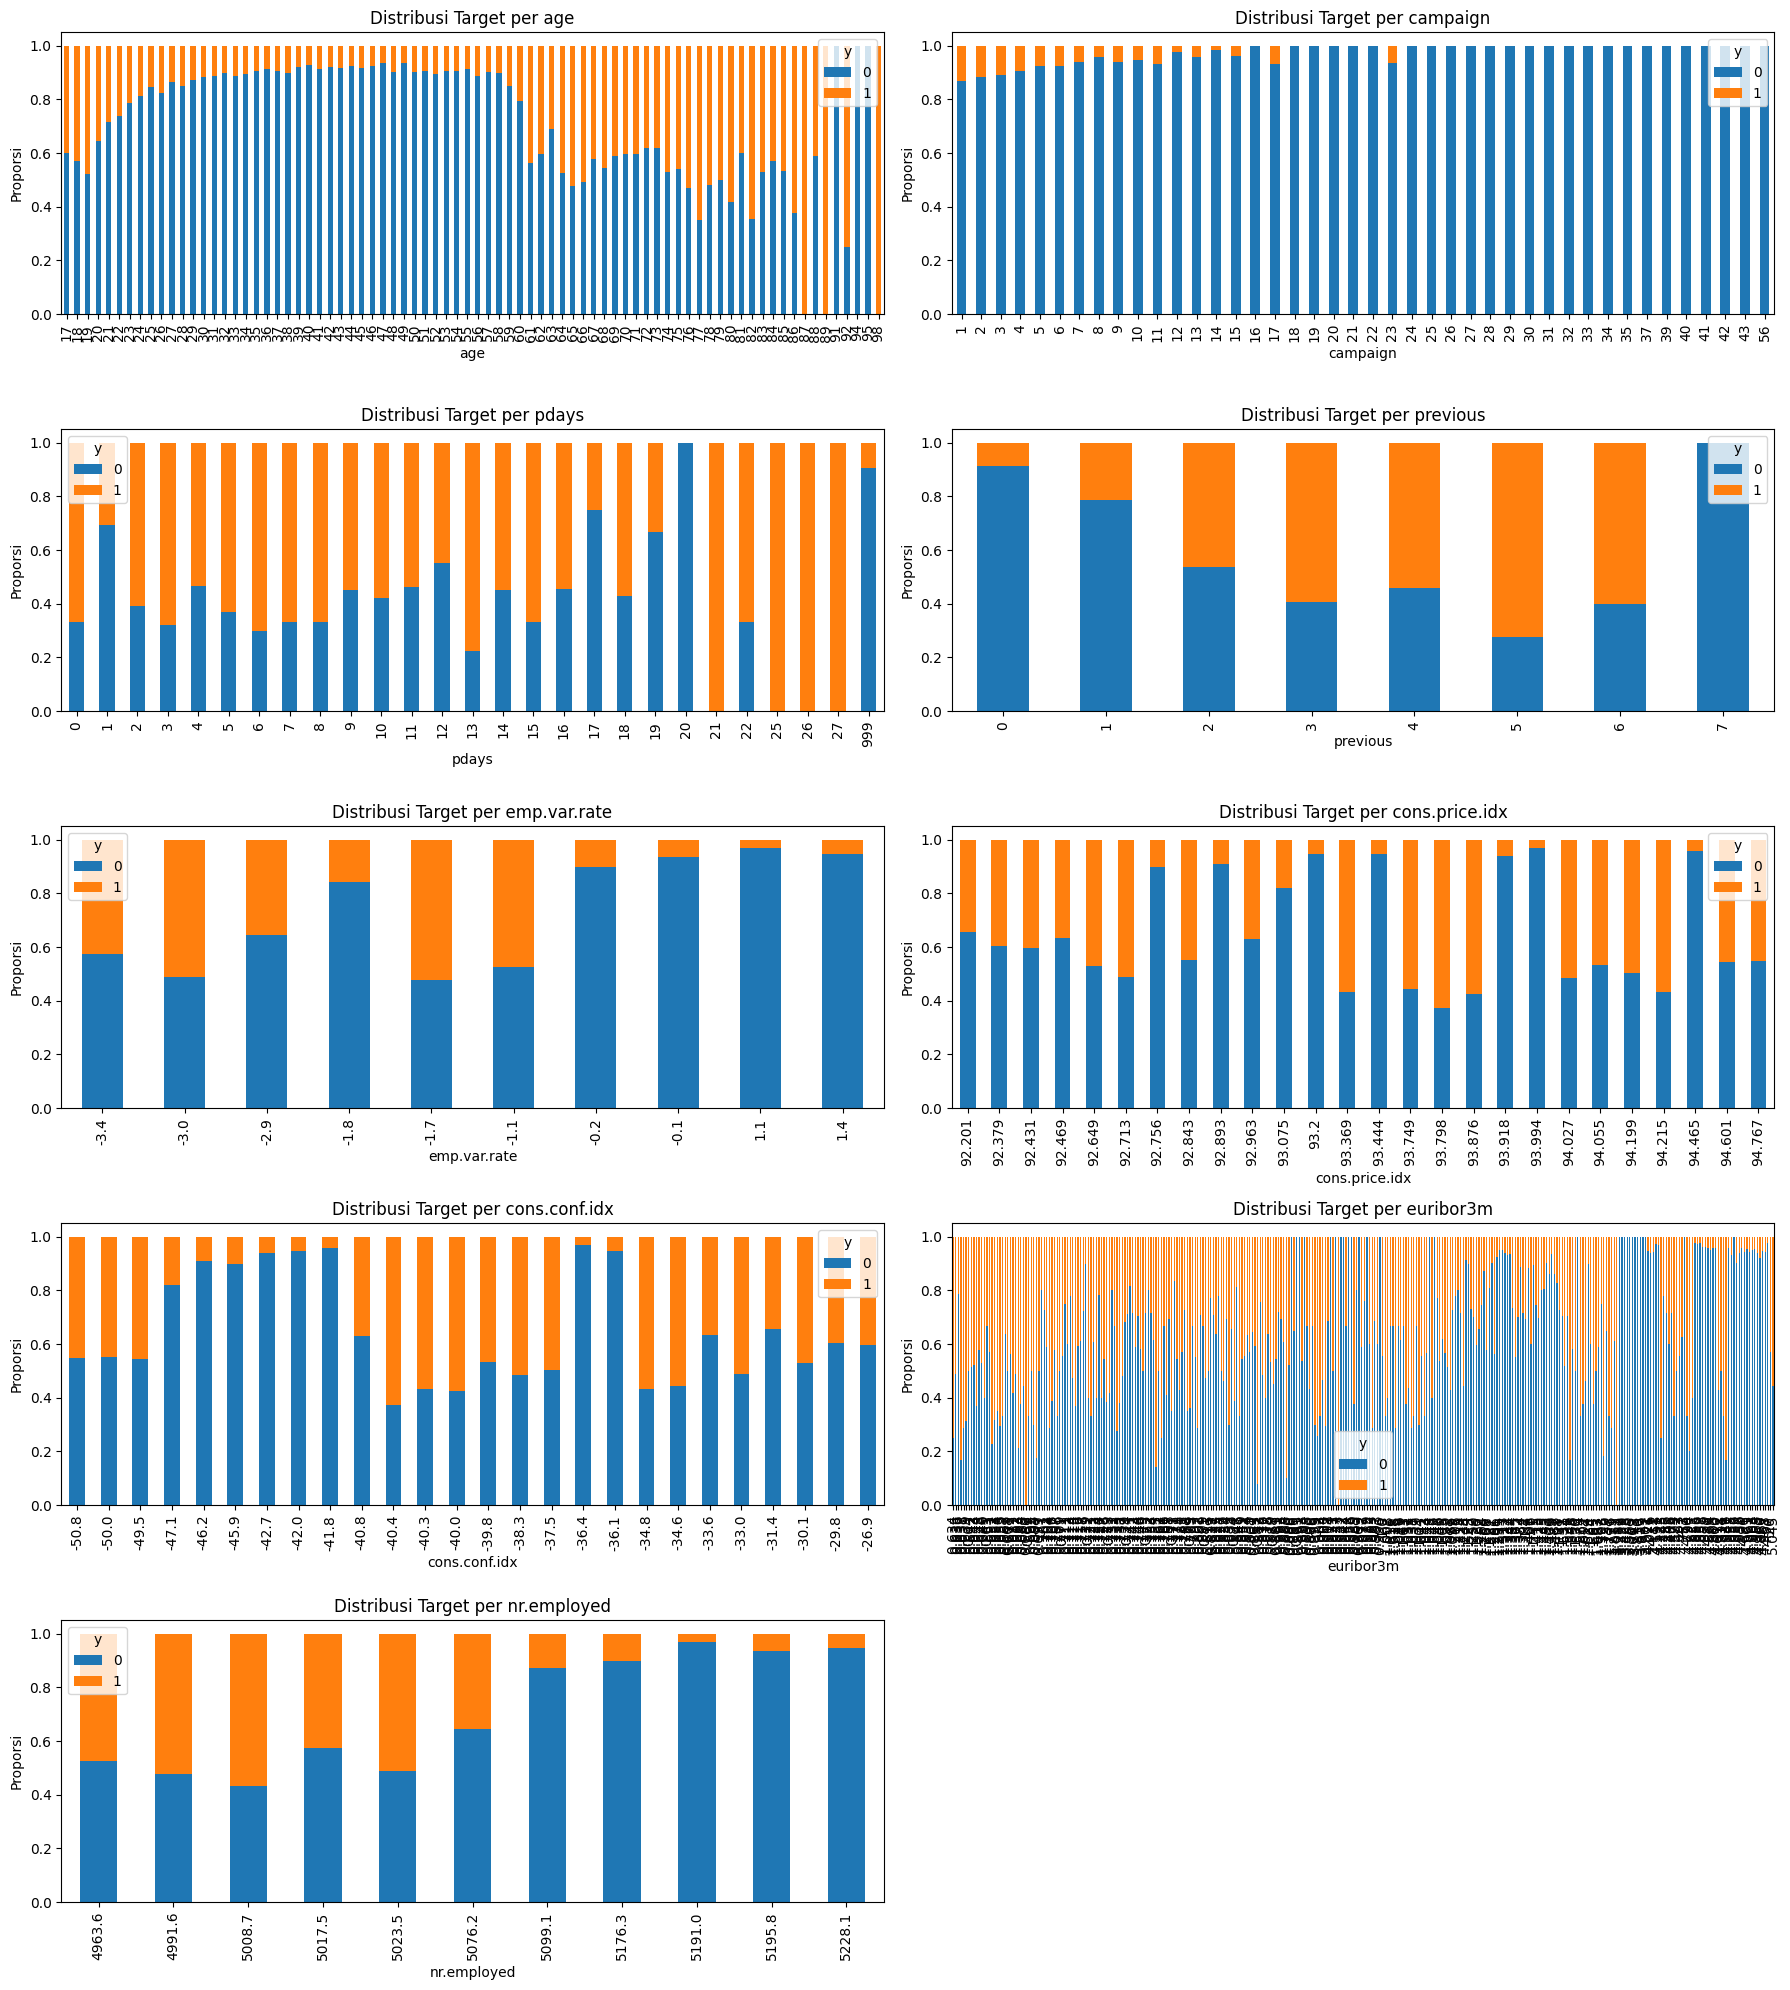

In [27]:
import math

# Ambil kolom yang ingin diplot (selain kategorikal utama dan target)
features_to_plot = df.drop(columns=['job','marital','education','default', 'housing', 'loan', 'contact', 'poutcome', 'y']).columns

# Hitung layout subplot
n = len(features_to_plot)
cols = 2
rows = math.ceil(n / cols)

fig = plt.figure(figsize=(18, 4 * rows))
count = 0

for col in features_to_plot:
    count += 1
    ax = plt.subplot(rows, cols, count)
    pd.crosstab(df[col], df['y'], normalize=0).plot(kind='bar', stacked=True, ax=ax)
    plt.title(f'Distribusi Target per {col}')
    plt.xlabel(col)
    plt.ylabel('Proporsi')
    plt.tight_layout()

plt.show()


In [28]:
for i in df.drop(columns=['job','marital','education','default', 'housing', 'loan', 'contact', 'poutcome', 'y']).columns:
    y_dist = df.groupby(i)['y'].value_counts(normalize=True).unstack()
    display(y_dist.sort_values(by=1, ascending=False))

y,0,1
age,,
98,NaN,1.000000
89,NaN,1.000000
87,NaN,1.000000
92,0.250000,0.750000
77,0.350000,0.650000
...,...,...
49,0.934446,0.065554
47,0.937433,0.062567
91,1.000000,NaN


y,0,1
campaign,,
1,0.869627,0.130373
2,0.885409,0.114591
3,0.892509,0.107491
4,0.906038,0.093962
6,0.923391,0.076609
5,0.924953,0.075047
17,0.931034,0.068966
11,0.932203,0.067797
23,0.937500,0.062500


y,0,1
pdays,,
27,NaN,1.000000
26,NaN,1.000000
25,NaN,1.000000
21,NaN,1.000000
13,0.222222,0.777778
6,0.298544,0.701456
3,0.321185,0.678815
15,0.333333,0.666667
22,0.333333,0.666667


y,0,1
previous,,
5,0.277778,0.722222
6,0.400000,0.600000
3,0.407407,0.592593
4,0.457143,0.542857
2,0.535809,0.464191
1,0.787985,0.212015
0,0.911676,0.088324
7,1.000000,NaN


y,0,1
emp.var.rate,,
-1.7,0.478655,0.521345
-3.0,0.488372,0.511628
-1.1,0.525984,0.474016
-3.4,0.575701,0.424299
-2.9,0.643201,0.356799
-1.8,0.840884,0.159116
-0.2,0.900000,0.100000
-0.1,0.936991,0.063009
1.4,0.946635,0.053365


y,0,1
cons.price.idx,,
93.798,0.373134,0.626866
93.876,0.424528,0.575472
93.369,0.431818,0.568182
94.215,0.434084,0.565916
93.749,0.442529,0.557471
94.027,0.484979,0.515021
92.713,0.488372,0.511628
94.199,0.504950,0.495050
92.649,0.529412,0.470588


y,0,1
cons.conf.idx,,
-40.4,0.373134,0.626866
-40.0,0.424528,0.575472
-34.8,0.431818,0.568182
-40.3,0.434084,0.565916
-34.6,0.442529,0.557471
-38.3,0.484979,0.515021
-33.0,0.488372,0.511628
-37.5,0.504950,0.495050
-30.1,0.529412,0.470588


y,0,1
euribor3m,,
3.053,NaN,1.000000
0.688,NaN,1.000000
0.933,NaN,1.000000
0.870,0.076923,0.923077
0.885,0.100000,0.900000
...,...,...
3.853,1.000000,NaN
3.879,1.000000,NaN
3.901,1.000000,NaN


y,0,1
nr.employed,,
5008.7,0.432308,0.567692
4991.6,0.478655,0.521345
5023.5,0.488372,0.511628
4963.6,0.525984,0.474016
5017.5,0.575701,0.424299
5076.2,0.643201,0.356799
5099.1,0.872011,0.127989
5176.3,0.900000,0.100000
5195.8,0.936991,0.063009


Berdasarkan barplot dan table diatas kita dapat menyimpulkan beberapa hal :

1. **Pekerjaan (`job`)**

   Calon nasabah dengan pekerjaan seperti `"student"` dan `"retired"` menunjukkan **proporsi ketertarikan** (`y = "yes"`) **yang lebih tinggi** dibandingkan kategori pekerjaan lainnya, seperti `blue-collar` atau `admin`.

2. **Status Pernikahan (`marital`)**

   Calon nasabah dengan status `single` cenderung **lebih tertarik** dibandingkan yang `"married"` atau `"divorced"`, meskipun perbedaannya tidak terlalu signifikan.

3. **Tingkat Pendidikan (`education`)**

   Nasabah dengan pendidikan **tertiary** (**'university.degree'**) menunjukkan **tingkat ketertarikan yang lebih tinggi** dibandingkan dengan yang memiliki pendidikan dasar (`basic.9y`, `basic.6y`) atau menengah.

4. **Pinjaman (`loan`) dan Perumahan (`housing`)**

   Nasabah **yang tidak memiliki pinjaman pribadi** (`loan = "no"`) atau **tidak sedang dalam kredit rumah** (`housing = "no"`) memiliki **tingkat ketertarikan lebih tinggi** dibandingkan yang sedang memiliki pinjaman/kredit.

5. **Default Kredit (`default`)**

   Nasabah yang **tidak pernah gagal bayar sebelumnya** (`default = "no"`) lebih tertarik terhadap produk yang ditawarkan dibandingkan yang memiliki riwayat gagal bayar.

6. **Jenis Kontak (`contact`)**

   Kontak melalui `"cellular"` memiliki **konversi (ketertarikan) yang jauh lebih tinggi** dibandingkan kontak melalui `"telephone"`, menunjukkan efektivitas medium komunikasi.

7. **Hasil Kontak Sebelumnya (`poutcome`)**

   Nasabah yang sebelumnya **berhasil (success)** dalam kampanye pemasaran menunjukkan proporsi `"yes"` **yang sangat tinggi**, sedangkan `nonexistent` dan `failure` cenderung tidak tertarik.

Sekarang mari kita lihat juga untuk kolom `job`, apakah terlihat perbedaan kecenderungan minat antara kandidat dari `job` yang berbeda.

In [29]:
relevent_experience_df = df.groupby('job')['y'].value_counts(normalize=True).unstack()
relevent_experience_df['count'] = df.groupby('job')['y'].count()
display(relevent_experience_df.sort_values(by=[1], ascending=False).head(15))
display(relevent_experience_df.sort_values(by=[1], ascending=False).tail(15))

y,0,1,count
job,,,
student,0.685714,0.314286,875
retired,0.747381,0.252619,1718
unemployed,0.857988,0.142012,1014
admin.,0.870872,0.129128,10749
management,0.887825,0.112175,2924
technician,0.891675,0.108325,6739
self-employed,0.895144,0.104856,1421
housemaid,0.900000,0.100000,1060
entrepreneur,0.914835,0.085165,1456


y,0,1,count
job,,,
student,0.685714,0.314286,875
retired,0.747381,0.252619,1718
unemployed,0.857988,0.142012,1014
admin.,0.870872,0.129128,10749
management,0.887825,0.112175,2924
technician,0.891675,0.108325,6739
self-employed,0.895144,0.104856,1421
housemaid,0.900000,0.100000,1060
entrepreneur,0.914835,0.085165,1456


Terlihat dari table diatas, bahwa ada perbedaan kecenderungan minat antara kandidat dari `job` yang berbeda.

Mari kita lihat kecenderungan 4 `job` dengan jumlah kandidat terbanyak.

In [23]:
df['job'].value_counts()

job
admin.           10749
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

In [11]:
relevent_experience_df.sort_values(by=[1], ascending=False).loc['admin.']

y
0            0.870872
1            0.129128
count    10749.000000
Name: admin., dtype: float64

In [12]:
relevent_experience_df.sort_values(by=[1], ascending=False).loc['blue-collar']

y
0           0.931049
1           0.068951
count    9253.000000
Name: blue-collar, dtype: float64

In [13]:
relevent_experience_df.sort_values(by=[1], ascending=False).loc['technician']

y
0           0.891675
1           0.108325
count    6739.000000
Name: technician, dtype: float64

In [14]:
relevent_experience_df.sort_values(by=[1], ascending=False).loc['services']

y
0           0.918578
1           0.081422
count    3967.000000
Name: services, dtype: float64

Terlihat bahwa `"admin."`,`"blue-collar"`, `"technician"`, dan `"services"` memiliki kecenderungan kandidat yang mirip, dimana jauh lebih banyak yang tidak berminat dibandingkan yang berminat.

### **Data Preparation**

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Daftar fitur kategorikal
categorical_features = ['job', 'marital', 'education', 'default', 
                        'housing', 'loan', 'contact', 'poutcome']
categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                    'loan', 'contact', 'poutcome']

# Column Transformer
transformer = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
], remainder='passthrough')


In [38]:
# df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [9]:
x = df.drop(columns=['y'])
y = df['y']
df

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,0,1,0,1,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41172,46,blue-collar,married,professional.course,0,0,0,1,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41173,56,retired,married,university.degree,0,1,0,1,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41174,44,technician,married,professional.course,0,0,0,1,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

In [11]:
x_train,x_test,y_train,y_test

(       age          job  marital            education  default  housing  loan  \
 39139   30   technician  married  professional.course        0        1     0   
 16073   37       admin.  married    university.degree        0        1     0   
 19698   30       admin.   single    university.degree        0        0     0   
 2716    42  blue-collar  married             basic.4y        0        1     0   
 14551   33    housemaid  married             basic.9y        0        0     0   
 ...    ...          ...      ...                  ...      ...      ...   ...   
 29817   35       admin.   single    university.degree        0        1     1   
 25109   48   technician   single  professional.course        0        1     1   
 27010   46       admin.   single          high.school        0        1     1   
 10699   33       admin.  married    university.degree        0        0     1   
 12291   31   technician  married          high.school        0        1     0   
 
        contac

In [12]:
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing.head()

,onehot__job_blue-collar,onehot__job_entrepreneur,onehot__job_housemaid,onehot__job_management,onehot__job_retired,onehot__job_self-employed,onehot__job_services,onehot__job_student,onehot__job_technician,onehot__job_unemployed,onehot__marital_single,onehot__education_basic.6y,onehot__education_basic.9y,onehot__education_high.school,onehot__education_illiterate,onehot__education_professional.course,onehot__education_university.degree,onehot__default_1,onehot__housing_1,onehot__loan_1,onehot__contact_1,onehot__poutcome_nonexistent,onehot__poutcome_success,remainder__age,remainder__campaign,remainder__pdays,remainder__previous,remainder__emp.var.rate,remainder__cons.price.idx,remainder__cons.conf.idx,remainder__euribor3m,remainder__nr.employed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,30.0,2.0,6.0,2.0,-1.8,93.369,-34.8,0.655,5008.7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,37.0,3.0,999.0,0.0,1.4,93.918,-42.7,4.961,5228.1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,30.0,4.0,999.0,0.0,1.4,93.444,-36.1,4.968,5228.1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,42.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.859,5191.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,33.0,4.0,999.0,0.0,1.4,93.918,-42.7,4.961,5228.1


In [13]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

In [14]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
import pandas as pd

# Daftar model
models = [logreg, knn, dt, rf, xgb, lgbm]
score = []
rata = []
std = []

# Evaluasi menggunakan Recall
for i in models:
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', i)
    ])
    model_cv = cross_val_score(estimator, x_train, y_train, cv=skfold, scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

# Hasil sebagai DataFrame
pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'mean recall': rata,
    'sdev': std
}).set_index('model').sort_values(by='mean recall', ascending=False)


[LightGBM] [Info] Number of positive: 2968, number of negative: 23384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 460
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112629 -> initscore=-2.064164
[LightGBM] [Info] Start training from score -2.064164
[LightGBM] [Info] Number of positive: 2969, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 30
[LightGBM] [Info] [bin

,mean recall,sdev
model,,
Decision Tree,0.344382,0.007537
Random Forest,0.289686,0.014226
XGBoost,0.281334,0.017215
KNN,0.270556,0.017824
LightGBM,0.262467,0.008780
Logistic Regression,0.184856,0.009309


In [16]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False)

[LightGBM] [Info] Number of positive: 2968, number of negative: 23384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112629 -> initscore=-2.064164
[LightGBM] [Info] Start training from score -2.064164
[LightGBM] [Info] Number of positive: 2969, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 460
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 30
[LightGBM] [Info] [bin

,mean recall,sdev
model,,
LightGBM,0.796440,0.011486
XGBoost,0.784815,0.008589
Random Forest,0.771709,0.009293
Logistic Regression,0.759079,0.010346
KNN,0.729407,0.009746
Decision Tree,0.619148,0.009532


In [ ]:
Terlihat bahwa model XGBoost adalah yang terbaik untuk roc_aucnya dari setiap model yang menggunakan default hyperparameter

In [17]:
# roc
models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'recall score':score_roc_auc}).set_index('model').sort_values(by='recall score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7308
           1       0.73      0.20      0.32       928

    accuracy                           0.90      8236
   macro avg       0.82      0.60      0.63      8236
weighted avg       0.89      0.90      0.88      8236

KNN 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7308
           1       0.53      0.28      0.37       928

    accuracy                           0.89      8236
   macro avg       0.72      0.62      0.65      8236
weighted avg       0.87      0.89      0.88      8236

Decision Tree 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      7308
           1       0.31      0.35      0.33       928

    accuracy                           0.84      8236
   macro avg       0.61      0.62      0.62      8236
weighted avg       0.85      0

,recall score
model,
LightGBM,0.801918
XGBoost,0.781115
Random Forest,0.762399
Logistic Regression,0.743863
KNN,0.719730
Decision Tree,0.626504


In [18]:
from sklearn.metrics import classification_report, recall_score

models = [logreg, knn, dt, rf, xgb, lgbm]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']
score_recall = []

def y_pred_func(model):
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    estimator.fit(x_train, y_train)
    return estimator, estimator.predict(x_test)

for model, name in zip(models, model_names):
    estimator, y_pred = y_pred_func(model)
    
    # Hitung recall (positif class = 1)
    recall = recall_score(y_test, y_pred)
    score_recall.append(recall)

    print(f"\n📌 {name}")
    print(classification_report(y_test, y_pred))

# Buat tabel ringkasan
result_df = pd.DataFrame({
    'model': model_names,
    'recall': score_recall
}).set_index('model').sort_values(by='recall', ascending=False)

result_df



📌 Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7308
           1       0.73      0.20      0.32       928

    accuracy                           0.90      8236
   macro avg       0.82      0.60      0.63      8236
weighted avg       0.89      0.90      0.88      8236


📌 KNN
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7308
           1       0.53      0.28      0.37       928

    accuracy                           0.89      8236
   macro avg       0.72      0.62      0.65      8236
weighted avg       0.87      0.89      0.88      8236


📌 Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7308
           1       0.31      0.34      0.32       928

    accuracy                           0.84      8236
   macro avg       0.61      0.62      0.62      8236
weighted avg       0.85    

,recall
model,
Decision Tree,0.341595
Random Forest,0.308190
KNN,0.280172
XGBoost,0.275862
LightGBM,0.268319
Logistic Regression,0.201509


In [19]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [20]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [21]:
data = x_train
target = y_train

In [22]:
print("start")
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler()

    X_ros, Y_ros = ros.fit_resample(X_train, Y_train)

    # instantiate model
    # lgbm = XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=2)
    lgbm = lgb.LGBMClassifier()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',lgbm)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator)
    
    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)

    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

print("end")

start
[LightGBM] [Info] Number of positive: 3339, number of negative: 26307
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 460
[LightGBM] [Info] Number of data points in the train set: 29646, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112629 -> initscore=-2.064164
[LightGBM] [Info] Start training from score -2.064164
[LightGBM] [Info] Number of positive: 26307, number of negative: 26307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 52614, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [23]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.913681,0.899818,0.876729,0.817987,0.705872,0.662604,0.324648,0.271505,0.780980,0.631250
1,0.913783,0.896782,0.874322,0.782715,0.708412,0.638697,0.330838,0.229111,0.774895,0.611511
2,0.912400,0.903157,0.874326,0.804191,0.701273,0.666397,0.318263,0.269542,0.768619,0.675676
3,0.913007,0.903461,0.877231,0.795616,0.705619,0.663285,0.326946,0.261456,0.767393,0.687943
4,0.913074,0.897693,0.875088,0.795172,0.705735,0.651256,0.326946,0.253369,0.768473,0.610390
5,0.913175,0.901032,0.874684,0.804004,0.704091,0.656044,0.322156,0.253369,0.776335,0.657343
6,0.914052,0.900121,0.873428,0.825581,0.708207,0.651013,0.329042,0.245283,0.781650,0.650000
7,0.913378,0.900729,0.875638,0.788920,0.708494,0.671848,0.332934,0.291105,0.765840,0.627907
8,0.913985,0.896478,0.874361,0.788708,0.709542,0.648340,0.332934,0.250674,0.775453,0.596154
9,0.913175,0.901336,0.876535,0.801522,0.704319,0.667145,0.322754,0.277628,0.775540,0.643750


In [24]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.791348,0.845173,0.888767,0.816259,0.789674,0.698375,0.702133,0.653226,0.854625,0.389423
1,0.796187,0.834548,0.889250,0.782447,0.795072,0.680568,0.722421,0.622642,0.847447,0.363208
2,0.788888,0.849120,0.884434,0.802121,0.787412,0.700856,0.705542,0.644205,0.846677,0.395695
3,0.791017,0.838798,0.888705,0.791591,0.789422,0.682540,0.703984,0.609164,0.852350,0.369281
4,0.788774,0.844869,0.884320,0.804489,0.787142,0.693983,0.701209,0.633423,0.850085,0.385246
5,0.787064,0.848209,0.886950,0.799646,0.785291,0.697252,0.696191,0.630728,0.850825,0.391960
6,0.789972,0.840619,0.888666,0.822064,0.788540,0.693784,0.707671,0.657682,0.847106,0.380062
7,0.791930,0.835458,0.889863,0.779409,0.790404,0.679450,0.706607,0.611860,0.851996,0.363200
8,0.790010,0.839709,0.888159,0.780914,0.788444,0.689266,0.703984,0.638814,0.850275,0.375594
9,0.785581,0.841530,0.887684,0.797198,0.783824,0.692293,0.695431,0.644205,0.848398,0.379968


In [25]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2922
           1       0.63      0.27      0.38       372

    accuracy                           0.90      3294
   macro avg       0.77      0.63      0.66      3294
weighted avg       0.88      0.90      0.88      3294

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2923
           1       0.61      0.23      0.33       371

    accuracy                           0.90      3294
   macro avg       0.76      0.61      0.64      3294
weighted avg       0.88      0.90      0.88      3294

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2923
           1       0.68      0.27      0.39       371

    accuracy                           0.90      3294
   macro avg       0.79      0.63      0.67      3294
weighted avg       0.89      0.90      0.88      3294

              preci

In [26]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2922
           1       0.39      0.65      0.49       372

    accuracy                           0.85      3294
   macro avg       0.67      0.76      0.70      3294
weighted avg       0.89      0.85      0.86      3294

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      2923
           1       0.36      0.62      0.46       371

    accuracy                           0.83      3294
   macro avg       0.66      0.74      0.68      3294
weighted avg       0.88      0.83      0.85      3294

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2923
           1       0.40      0.64      0.49       371

    accuracy                           0.85      3294
   macro avg       0.67      0.76      0.70      3294
weighted avg       0.89      0.85      0.86      3294

              preci

In [36]:
# lgbm = XGBClassifier(eval_metric='logloss', verbosity=2)
lgbm = lgb.LGBMClassifier()
ros = RandomOverSampler(random_state=42)

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])

In [33]:
# hyperparam_space=[{
#     'model__max_bin': [255, 275, 300, 230],
#     'model__num_leaves':[31, 21, 41, 51],
#     'model__min_data_in_leaf': [20, 15, 30, 40],
#     'model__num_iterations':[100,75, 125, 150],
#     'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
#     'model__random_state': [42]
# }]

hyperparam_space = [{
    'model__max_bin': [230, 255, 275],                 # 3 pilihan
    'model__num_leaves': [21, 31, 41],                # 3 pilihan
    'model__min_data_in_leaf': [20, 30, 40],          # 3 pilihan
    'model__num_iterations': [75, 100, 125],          # 3 pilihan
    'model__learning_rate': [0.05, 0.1, 0.125],       # 3 pilihan
    'model__random_state': [42]                       # tetap
}]

# hyperparam_space = [{
#     'model__max_depth': [3, 5, 7, 9],               # mirip dengan kontrol jumlah leaves
#     'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
#     'model__n_estimators': [100, 75, 125, 150],      # num_iterations ≈ n_estimators
#     'model__min_child_weight': [1, 3, 5, 7],         # mirip dengan min_data_in_leaf
#     'model__subsample': [0.8, 0.9, 1.0],             # tambahan: untuk regularisasi
#     'model__colsample_bytree': [0.8, 0.9, 1.0],      # tambahan: untuk regularisasi
#     'model__random_state': [42]
# }]

# hyperparam_space = [{
#     'model__max_depth': [5],
#     'model__learning_rate': [0.1, 0.05],
#     'model__n_estimators': [100],
#     'model__min_child_weight': [3],
#     'model__subsample': [0.9],
#     'model__colsample_bytree': [0.8, 1.0],
#     'model__random_state': [42]
# }]

In [34]:
# grid = GridSearchCV(estimator, n_jobs=-1, param_grid=hyperparam_space, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))
grid = GridSearchCV(estimator, n_jobs=-1, param_grid=hyperparam_space, scoring='recall', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

In [30]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier
import numpy as np


lgbm = LGBMClassifier()
ros = RandomOverSampler(random_state=42)

# Gunakan imblearn.Pipeline
estimator = Pipeline([
    ('oversampling', ros),
    ('preprocess', transformer),
    ('model', lgbm)
])

hyperparam_space = [{
    'model__max_bin': [230, 255, 275],
    'model__num_leaves': [21, 31, 41],
    'model__min_data_in_leaf': [20, 30, 40],
    'model__num_iterations': [75, 100, 125],
    'model__learning_rate': [0.05, 0.1, 0.125],
    'model__random_state': [42]
}]

# grid = GridSearchCV(
#     estimator=estimator,
#     param_grid=hyperparam_space,
#     scoring='recall',  # atau 'roc_auc', sesuai target evaluasi
#     cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
#     verbose=1,
#     n_jobs=-1
# )

grid = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=hyperparam_space,
    n_iter=20,  # Coba 20 kombinasi acak
    scoring='recall',  # bisa diganti 'roc_auc' sesuai kebutuhan
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=1,
    n_jobs=-1,
    random_state=42
)


# from datetime import datetime
import time

print("Tanggal dan waktu sekarang:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
# Fit model
start = time.time()

print("start")
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)
print("end")

# Hasil terbaik
print("end")
print(f"Waktu eksekusi: {end - start:.2f} detik")
print("Tanggal dan waktu sekarang:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

In [80]:
from imblearn.pipeline import Pipeline  # pastikan pakai ini
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from datetime import datetime
import time

# Misalnya kamu pakai XGBoost
from xgboost import XGBClassifier

# Inisialisasi model
xgb = XGBClassifier(eval_metric='logloss')
print("satu")
# Pipeline dengan oversampling
estimator = Pipeline([
    ('preprocess', transformer),
    ('oversample', RandomOverSampler(random_state=42)),
    ('model', xgb)
])
print("dua")
# Hyperparameter grid
hyperparam_space = [{
    'model__max_depth': [3, 5],
    'model__learning_rate': [0.1, 0.05],
    'model__n_estimators': [100, 150],
    'model__min_child_weight': [1, 3],
    'model__subsample': [0.8],
    'model__colsample_bytree': [0.8],
    'model__random_state': [42]
}]
print("tiga")
# Grid search dengan scoring recall
grid = GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    scoring='recall',
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)
print("empat")
print("Tanggal dan waktu sekarang:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
# Fit model
start = time.time()
grid.fit(x_train, y_train)
end = time.time()

# Hasil terbaik
print("Best Recall Score:", grid.best_score_)
print("Best Params:", grid.best_params_)
print("end")
print(f"Waktu eksekusi: {end - start:.2f} detik")
print("Tanggal dan waktu sekarang:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

satu
dua
tiga
empat
Tanggal dan waktu sekarang: 2025-07-28 01:33:00
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best Recall Score: 0.9991913746630727
Best Params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_child_weight': 1, 'model__n_estimators': 100, 'model__random_state': 42, 'model__subsample': 0.8}
end
Waktu eksekusi: 71.67 detik
Tanggal dan waktu sekarang: 2025-07-28 01:34:12


In [81]:
from imblearn.pipeline import Pipeline  # pastikan pakai ini
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from datetime import datetime
import time

# Misalnya kamu pakai XGBoost
from xgboost import XGBClassifier

# Inisialisasi model
xgb = XGBClassifier(eval_metric='logloss')
print("satu")
# Pipeline dengan oversampling
estimator = Pipeline([
    ('preprocess', transformer),
    ('oversample', RandomOverSampler(random_state=42)),
    ('model', xgb)
])
print("dua")
# Hyperparameter grid
# hyperparam_space = [{
#     'model__max_depth': [3, 5],
#     'model__learning_rate': [0.1, 0.05],
#     'model__n_estimators': [100, 150],
#     'model__min_child_weight': [1, 3],
#     'model__subsample': [0.8],
#     'model__colsample_bytree': [0.8],
#     'model__random_state': [42]
# }]
hyperparam_space = [{
    'model__max_depth': [3, 5, 7, 9],               # mirip dengan kontrol jumlah leaves
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
    'model__n_estimators': [100, 75, 125, 150],      # num_iterations ≈ n_estimators
    'model__min_child_weight': [1, 3, 5, 7],         # mirip dengan min_data_in_leaf
    'model__subsample': [0.8, 0.9, 1.0],             # tambahan: untuk regularisasi
    'model__colsample_bytree': [0.8, 0.9, 1.0],      # tambahan: untuk regularisasi
    'model__random_state': [42]
}]
print("tiga")
# Grid search dengan scoring recall
grid = GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    scoring='recall',
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)
print("empat")
print("Tanggal dan waktu sekarang:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
# Fit model
start = time.time()
grid.fit(x_train, y_train)
end = time.time()

# Hasil terbaik
print("Best Recall Score:", grid.best_score_)
print("Best Params:", grid.best_params_)
print("end")
print(f"Waktu eksekusi: {end - start:.2f} detik")
print("Tanggal dan waktu sekarang:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

satu
dua
tiga
empat
Tanggal dan waktu sekarang: 2025-07-28 01:35:09
Fitting 10 folds for each of 2304 candidates, totalling 23040 fits
Best Recall Score: 0.9991913746630727
Best Params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_child_weight': 1, 'model__n_estimators': 100, 'model__random_state': 42, 'model__subsample': 0.8}
end
Waktu eksekusi: 9772.94 detik
Tanggal dan waktu sekarang: 2025-07-28 04:18:02


In [32]:
best_model = grid.best_estimator_
print("Tanggal dan waktu sekarang:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
start = time.time()
best_model.fit(x_train, y_train)
end = time.time()
print("end")
print(f"Waktu eksekusi: {end - start:.2f} detik")
print("Tanggal dan waktu sekarang:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))


Tanggal dan waktu sekarang: 2025-07-31 20:54:15
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Info] Number of positive: 29229, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 475
[LightGBM] [Info] Number of data points in the train set: 58458, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
end
Waktu eksekusi: 0.90 detik
Tanggal dan waktu sekarang: 2025-07-31 20:54:16


In [33]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])
estimator.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 29229, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 58458, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'poutcome'])])),
                ('model', LGBMClassifier())])

In [34]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default)
print('ROC AUC Score Tuned LGBM : ', roc_auc_tuned)

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
ROC AUC Score Default LGBM :  0.8016908872893191
ROC AUC Score Tuned LGBM :  0.8082330063416567


In [35]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default XGBOOST : \n', report_default)
print('Classification Report Tuned XGBOOST : \n', report_tuned)

Classification Report Default XGBOOST : 
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      7308
           1       0.37      0.62      0.47       928

    accuracy                           0.84      8236
   macro avg       0.66      0.74      0.69      8236
weighted avg       0.88      0.84      0.86      8236

Classification Report Tuned XGBOOST : 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      7308
           1       0.37      0.63      0.47       928

    accuracy                           0.84      8236
   macro avg       0.66      0.75      0.69      8236
weighted avg       0.88      0.84      0.86      8236



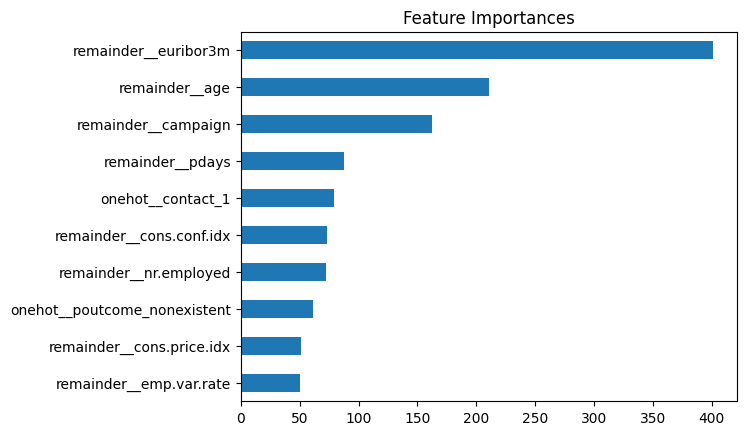

In [36]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = True).tail(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

In [37]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      7308
           1       0.37      0.63      0.47       928

    accuracy                           0.84      8236
   macro avg       0.66      0.75      0.69      8236
weighted avg       0.88      0.84      0.86      8236

